Aplicação do algoritmo de Naive Bayes

Base risco de crédito

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
#importação para ter acesso ao algoritmo de aprendizado de máquina Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
#abrindo o arquivo risco de crédito
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [ ]:
#os atributos historia, dívida, garantias e renda são previsores
#com base nesses atributos previsores, queremos classificar o risco em alto, moderado ou baixo
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
#Realizando a divisão dos atributos previsores e classe, temos:
#criando a variável que armazenará os atributos previsores:
#o ".values" converte a tabela para um array numpy
x_risco_credito = base_risco_credito.iloc[:,0:4].values

In [ ]:
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
#criando a variável que armazenará os atributos classe
y_risco_credito = base_risco_credito.iloc[:,4].values

In [ ]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [ ]:
#vimos que tanto a base de dados de atributos previsores quanto a base de dados com os atributos classe
#possuem valores categóricos. Neste momento, após a divisão dos previsores, precisamos converter
#os valores categóricos (strings) em valores numéricos para aplicar nos algoritmos de aprendizado de máquina.


In [ ]:
#Aplicando LabelEncoder, temos:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida =LabelEncoder()
label_encoder_garantias = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
x_risco_credito[:,0] = label_encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_encoder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_encoder_garantias.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_encoder_renda.fit_transform(x_risco_credito[:,3])

In [ ]:
#Note que com o LabelEncoder convertemos os valores categóricos em valores numéricos
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
#Como essa base de dados é pequena, não vamos usar o OneHotEncoder, pois estamos apenas testando os algoritmos

In [ ]:
#Vamos gravar as variáveis "x_risco_credito" e "y_risco_credito", para serem utilizadas nos algoritmos de machine learning
import pickle
with open('risco_credito.pkl','wb') as f:
  pickle.dump([x_risco_credito,y_risco_credito],f)

In [ ]:
#Aplicando o algoritmo de Naive Bayes, temos:
naive_risco_credito = GaussianNB()


In [ ]:
#Para a utilização desse algoritmo, precisamos treinar a máquina. Para o Naive Bayes, o treinamento consiste
#na geração de uma tabela de probabilidades. para isso utilizamos o seguinte comando:
#".fit(variável com previsores, variável com classes)" A função ".fit" gera a tabela de probabilidades.
naive_risco_credito.fit(x_risco_credito,y_risco_credito)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Ao executar a célula acima, nosso algoritmo está criado e treinado. Podendo ser utilizado para previsões

In [ ]:
#Prevendo os risco para conceder empréstimo para um cliente, temos:
#Para prevermos a classe, a partir de um conjunto de atributos previsores, usamos a função:
#".predict([[valores numéricos previsores separados por vírgula na ordem das colunas da base de dados]])"
#a variável previs]ao retornará apenas a classe.
#valores numéricos dos atributos previsores:
#história: ruim (2), desconhecida (1), boa (0)
#divida: baixa (1), alta (0)
#garantias: nenhuma (1), adequada (0)
#renda: menor 15 (0), 15 a 35 (1), acima de 35 (2)

In [ ]:
#prevendo para o cliente com os seguintes previsores:
# historia boa, divida alta, garantias nenhuma, renda >35
#história ruim, divida alta, garantias adequada, renda <15
previsao = naive_risco_credito.predict([[0,0,1,2],[2,0,0,0]])

In [ ]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
#Podemos visualizar algumas propriedades do algoritmo criado
#Podemos visualizar as classes usando ".classes_"
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
#Podemos contar quantos atributos de cada classe temos na base de dados de treinamento:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [ ]:
#Podemos visualizar quantos atributos em cada classe na base de dados a partir das porcentagens
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

Base credit data

In [ ]:
#Abrindo a base de dados já pré-processada e armazenada na variável "credit.pkl", temos:
with open('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
# a base de dados credit_data tem apenas 2000 registros. Anteriormente, dividimos os dados em 25% para o teste
x_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [ ]:
#após abrir as variáveis contendo os dados pré-tratados, podemos treinar o algoritmo Naive Bayes
#instanciamos a variável naive_credit_data como objeto GaussianNB:
naive_credit_data = GaussianNB()
#Criamos a tabela de probabilidade:
naive_credit_data.fit(x_credit_treinamento,y_credit_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Agora utilizamos o conjunto de dados de teste "x_credit_teste"
previsoes = naive_credit_data.predict(x_credit_teste)

In [ ]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#comparando com as respostas verdadeiras, temos:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#Neste momento, podemos comparar as respostas previstas pelo algoritmo de Naive Bayes com os dados
#históricos reais:
#a função "accuracy_score" da biblioteca "sklearn.metrics" realiza a contagem de erros e acertos do 
#algoritmo de aprendizagem de máquina
from sklearn.metrics import accuracy_score

In [ ]:
#A função "accuracy_score" recebe dois parâmetros: o primeiro são as respostas verdadeiras
#o segundo parâmetro recebe as respostas previstas pelo algoritmo de aprendizagem.
accuracy_score(y_credit_teste,previsoes)

0.938

In [ ]:
#Temos um acerto de 93,8% das previsões feitas com o algoritmo.


In [ ]:
#Podemos ainda fazer uma matriz de confusão
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_credit_teste,previsoes)

array([[428,   8],
       [ 23,  41]])

0.938

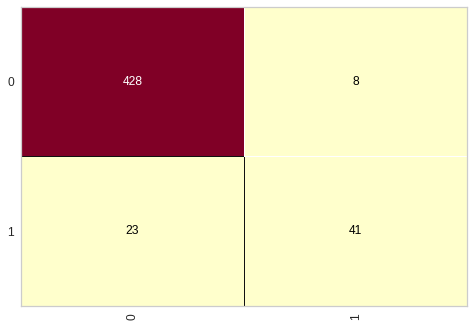

In [ ]:
#Podemos usar a biblioteca yellowbrick.classifier para gerar uma matriz confusão de melhor interpretação:
#A intersecção dos índices de linhas e colunas nos dá a quantidade de valores corretamente previstos
#Enquanto as células com índice de linha e índice de colunas diferentes retornam as quantidades de previsões incorretas
#Os índices de linhas indicam os valores corretos
#Os indices de colunas indicam os valores previstos
from yellowbrick.classifier import ConfusionMatrix
cn = ConfusionMatrix(naive_credit_data)
cn.fit(x_credit_treinamento, y_credit_treinamento)
cn.score(x_credit_teste,y_credit_teste)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#Resumindo: na biblioteca "sklearn.metrics" temos as seguintes funções:
#accuracy_score - retorna a eficácia do algoritmo, a porcentagem de acertos (comparando dados reais com previstos)
#confusion_matrix - retorna uma matrix com a quantidade de acertos e erros de cada classe
#classification_report- 

In [ ]:
#a coluna recall mostra a precisão do algoritmo em identificar os valores corretos
#a coluna precision mostra a precisão do algoritmo em acertar os valores corretos
print(classification_report(y_credit_teste,previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



Base de dados census

In [ ]:
with open('census.pkl','rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [ ]:
x_census_treinamento.shape, y_census_treinamento.shape, x_census_teste.shape, y_census_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [ ]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento,y_census_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
previsoes = naive_census.predict(x_census_teste)

In [ ]:
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
#comparando os dados reais com os previstos
accuracy_score(y_census_teste,previsoes)

0.4767656090071648

0.4767656090071648

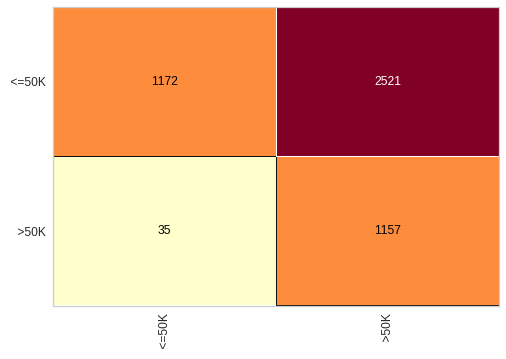

In [ ]:
cn = ConfusionMatrix(naive_census)
cn.fit(x_census_treinamento,y_census_treinamento)
cn.score(x_census_teste,y_census_teste)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_census_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

